<a href="https://colab.research.google.com/github/KishoreRam-M/Machine-Learing/blob/main/Preprocessing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import Lib

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [202]:
dataset=pd.read_csv("/content/boston.csv")
display(dataset.head())
dataset.isnull().sum()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


# Check  the Missing Value

In [203]:
dataset.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


# check the Outlier

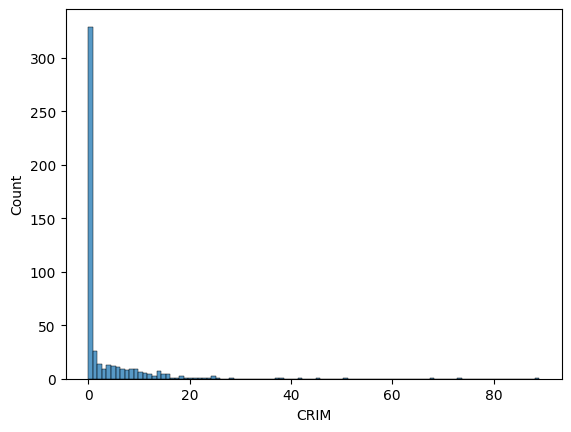

np.float64(5.223148798243851)

In [204]:
sns.histplot(dataset['CRIM'])
plt.show()
dataset['CRIM'].skew()

# Remove Outilers

In [205]:
continuous_vars = ["CRIM", "ZN", "INDUS", "NOX", "RM",
                   "DIS",   "LSTAT", "MEDV"]
cleaned_data = dataset.copy()
for feature in continuous_vars:
   Q1=cleaned_data[feature].quantile(0.25)
   Q3=cleaned_data[feature].quantile(0.75)
   IQR = Q3-Q1
   lower_bound = Q1 -1.5* IQR
   upper_bound=Q3+1.5*IQR
   cleaned_data = cleaned_data[(cleaned_data[feature] <= upper_bound) & (cleaned_data[feature] >= lower_bound)]
dataset=cleaned_data

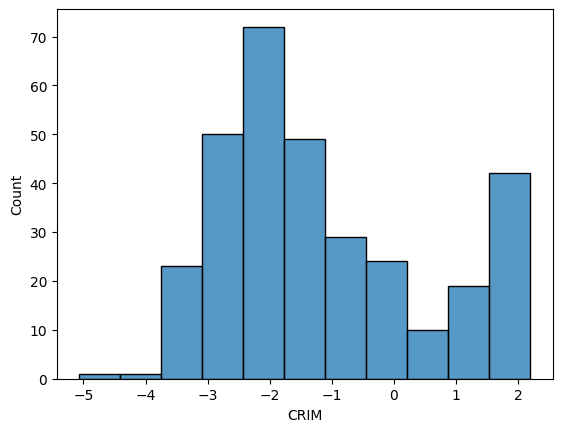

np.float64(0.589171077991657)

In [206]:
dataset['CRIM']= np.log (dataset['CRIM'])
sns.histplot(dataset['CRIM'])
plt.show()
dataset['CRIM'].skew()

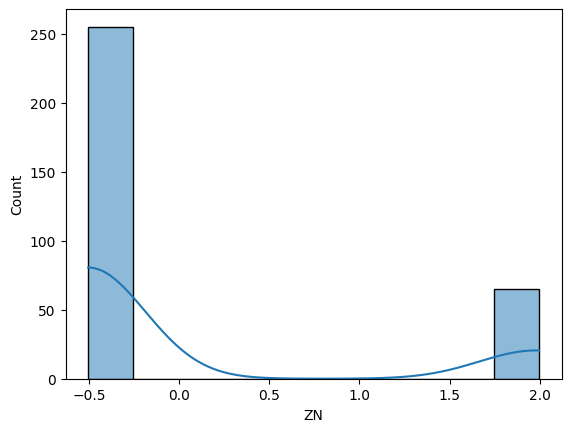

Skew after Yeo-Johnson: 1.4829057184663312


In [207]:
from sklearn.preprocessing import PowerTransformer
                                                                                                         # Yeo-Johnson handles zeros and negative values
pt = PowerTransformer(method='yeo-johnson')
                                                                                                         # Reshape is needed because PowerTransformer expects 2D input
dataset['ZN'] = pt.fit_transform(dataset['ZN'].values.reshape(-1, 1))

                                                                                                         # Check histogram
sns.histplot(dataset['ZN'], kde=True)
plt.show()

                                                                                                         # Check skewness
print("Skew after Yeo-Johnson:", dataset['ZN'].skew())



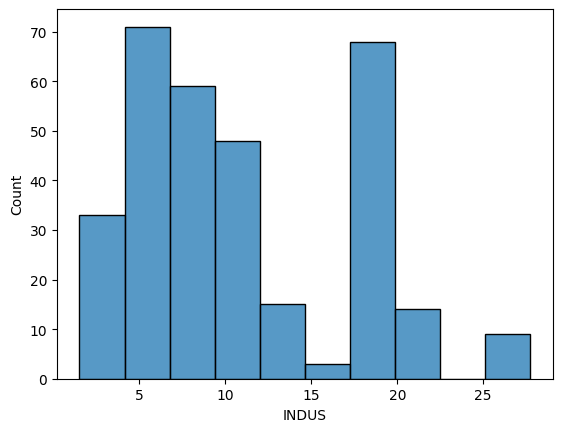

np.float64(0.6733279510112612)

In [208]:
sns.histplot(dataset['INDUS'])
plt.show()
dataset['INDUS'].skew()

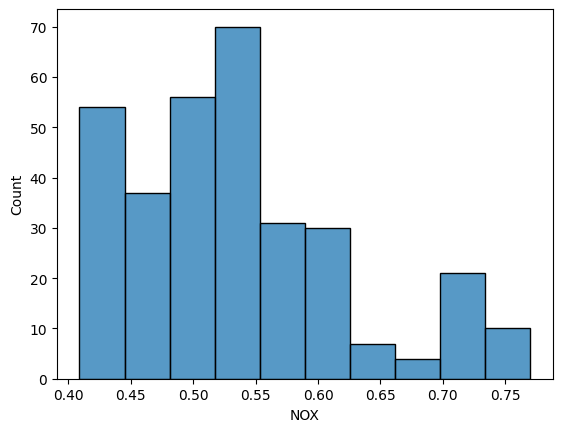

np.float64(0.7926491955641751)

In [209]:
sns.histplot(dataset['NOX'])
plt.show()
dataset['NOX'].skew()

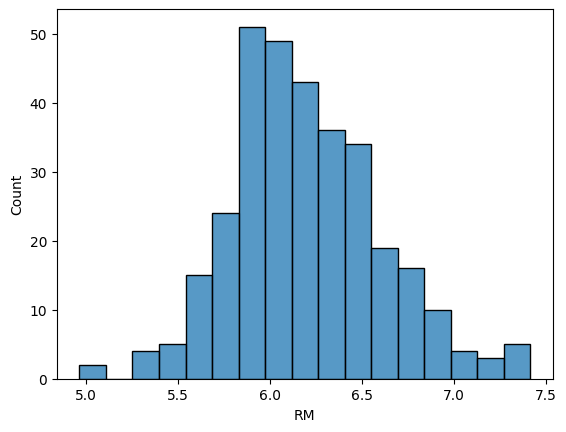

np.float64(0.38024301178233577)

In [210]:
sns.histplot(dataset['RM'])
plt.show()
dataset['RM'].skew()

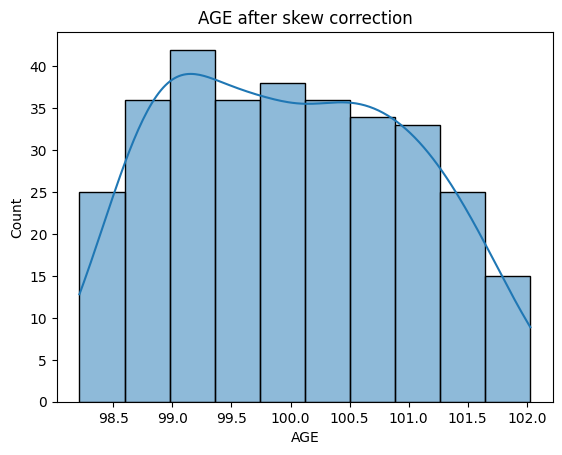

Skew after transformation: 0.14263480756210695


In [211]:
 #Step 1: Mirror the left-skewed AGE column
max_val = dataset['AGE'].max()
dataset['AGE'] = max_val - dataset['AGE']

# Step 2: Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
dataset['AGE'] = pt.fit_transform(dataset['AGE'].values.reshape(-1, 1))

# Step 3: Flip back to original orientation
dataset['AGE'] = max_val - dataset['AGE']

# Step 4: Plot histogram after transformation
sns.histplot(dataset['AGE'], kde=True)
plt.title("AGE after skew correction")
plt.show()

# Step 5: Check skew
print("Skew after transformation:", dataset['AGE'].skew())


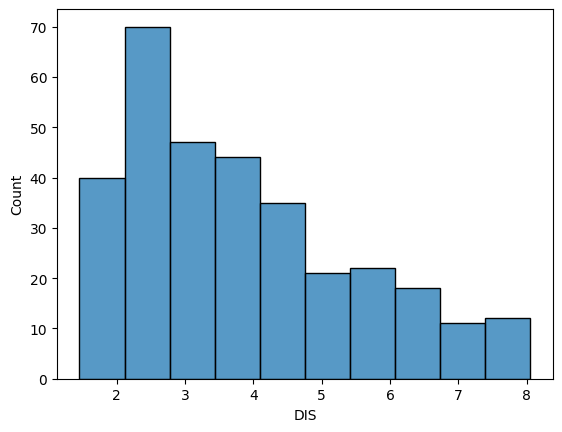

np.float64(0.7562453135995845)

In [212]:
sns.histplot(dataset['DIS'])
plt.show()
dataset['DIS'].skew()

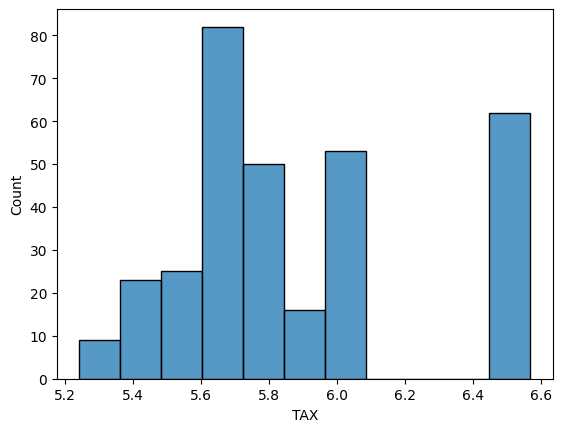

np.float64(0.6360823185434723)

In [213]:
dataset['TAX']= np.log (dataset['TAX']+1)
sns.histplot(dataset['TAX'])
plt.show()
dataset['TAX'].skew()

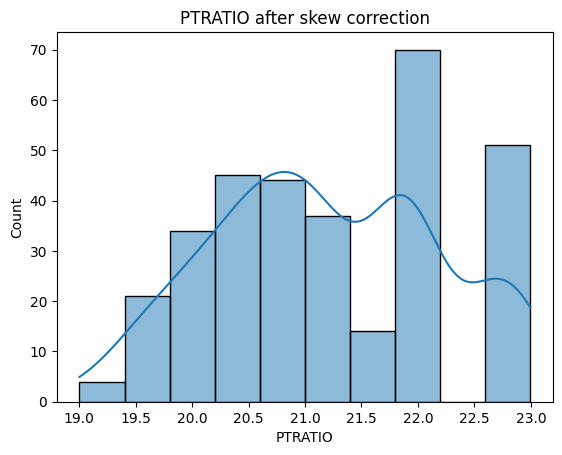

Skew after transformation: 0.02902847270762663


In [214]:

# Step 1: Mirror the left-skewed PTRATIO column
max_val = dataset['PTRATIO'].max()
dataset['PTRATIO'] = max_val - dataset['PTRATIO']

# Step 2: Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
dataset['PTRATIO'] = pt.fit_transform(dataset['PTRATIO'].values.reshape(-1, 1))

# Step 3: Flip back to original orientation
dataset['PTRATIO'] = max_val - dataset['PTRATIO']

# Step 4: Plot histogram after transformation
sns.histplot(dataset['PTRATIO'], kde=True)
plt.title("PTRATIO after skew correction")
plt.show()

# Step 5: Check skew
print("Skew after transformation:", dataset['PTRATIO'].skew())

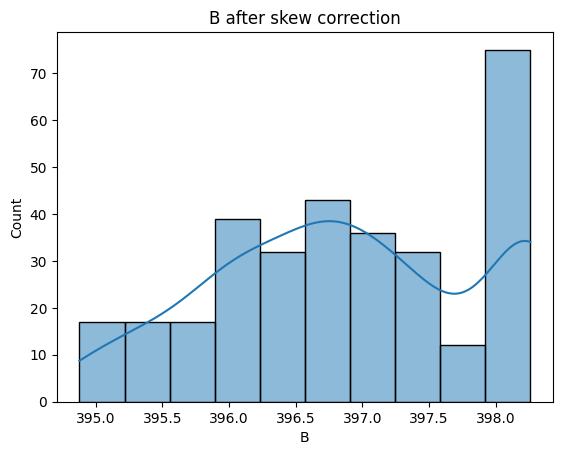

Skew after transformation: -0.1110104567994088


In [215]:
# Step 1: Mirror the left-skewed B column
max_val = dataset['B'].max()
dataset['B'] = max_val - dataset['B']

# Step 2: Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
dataset['B'] = pt.fit_transform(dataset['B'].values.reshape(-1, 1))

# Step 3: Flip back to original orientation
dataset['B'] = max_val - dataset['B']

# Step 4: Plot histogram after transformation
sns.histplot(dataset['B'], kde=True)
plt.title("B after skew correction")
plt.show()

# Step 5: Check skew
print("Skew after transformation:", dataset['B'].skew())


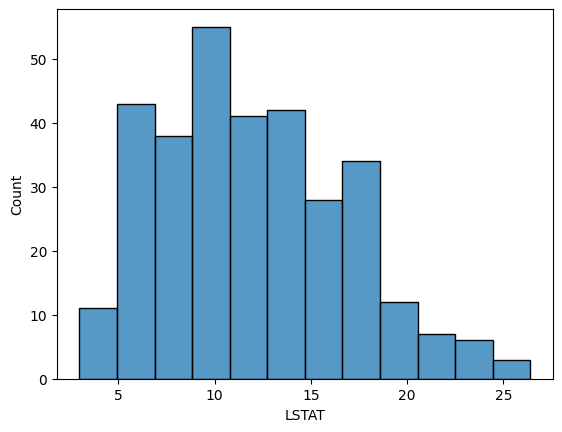

np.float64(0.4724715317227715)

In [216]:
sns.histplot(dataset['LSTAT'])
plt.show()
dataset['LSTAT'].skew()

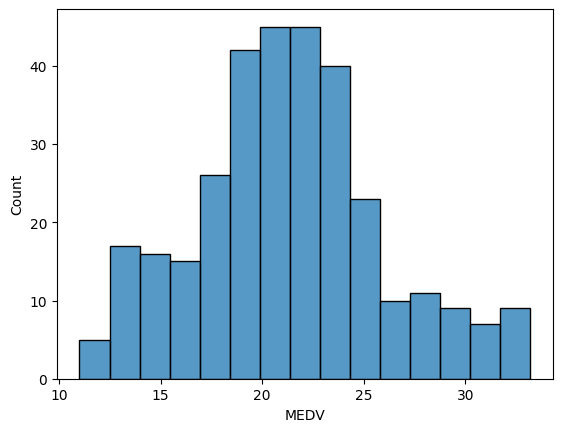

np.float64(0.4724715317227715)

In [217]:
sns.histplot(dataset['MEDV'])
plt.show()
dataset['LSTAT'].skew()

## PowerTransformer(method='yeo-johnson')

### 🔹 Step 1: Subtract the minimum

$$
X - X_{\min}
$$

* This **shifts all values** so the **smallest value becomes 0**.
* Example:

  $$
  X = [-3, -2, 0, 1, 2], \quad X_{\min} = -3
  $$

  $$
  X - X_{\min} = [-3 - (-3), -2 - (-3), 0 - (-3), 1 - (-3), 2 - (-3)] = [0, 1, 3, 4, 5]
  $$

---

### 🔹 Step 2: Add 1

$$
X - X_{\min} + 1
$$

* Ensures **no value is zero**, because squaring 0 doesn’t help with skew sometimes.
* Example:

  $$
  [0, 1, 3, 4, 5] + 1 = [1, 2, 4, 5, 6]
  $$

---

### 🔹 Step 3: Square the result

$$
(X - X_{\min} + 1)^2
$$

* Squaring **stretches larger values more than smaller values**, which helps **reduce left skew** (negative skew).

* Example:

  $$
  [1, 2, 4, 5, 6]^2 = [1, 4, 16, 25, 36]
  $$

* Notice how the left tail (small values) becomes less extreme compared to the right side → **distribution moves closer to normal**.


# Model

In [218]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [219]:
dataset['MEDV']


,MEDV
0,24.0
1,21.6
5,28.7
6,22.9
7,27.1
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [223]:
X = dataset.drop('MEDV', axis=1)  # inputs
y = dataset['MEDV']               # output
print("x:",X)
print("y",y)

x:          CRIM        ZN  INDUS  CHAS    NOX     RM         AGE     DIS  RAD  \
0   -5.064036  1.971882   2.31     0  0.538  6.575   99.650539  4.0900    1   
1   -3.600502 -0.504868   7.07     0  0.469  6.421  100.174381  4.9671    2   
5   -3.511570 -0.504868   2.18     0  0.458  6.430   99.447122  6.0622    3   
6   -2.427128  1.949497   7.87     0  0.524  6.012   99.697393  5.5605    5   
7   -1.934130  1.949497   7.87     0  0.524  6.172  101.330617  5.9505    5   
..        ...       ...    ...   ...    ...    ...         ...     ...  ...   
501 -2.770511 -0.504868  11.93     0  0.573  6.593   99.784194  2.4786    1   
502 -3.095111 -0.504868  11.93     0  0.573  6.120  100.078382  2.2875    1   
503 -2.800824 -0.504868  11.93     0  0.573  6.976  100.860376  2.1675    1   
504 -2.211009 -0.504868  11.93     0  0.573  6.794  100.739642  2.3889    1   
505 -3.048922 -0.504868  11.93     0  0.573  6.030  100.262343  2.5050    1   

          TAX    PTRATIO           B  LSTAT  
0 

# Train Split

In [224]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)

(256, 13) (64, 13)


# Standarized

In [225]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

# Lets Start Model Training

In [226]:
regression=LinearRegression()
regression.fit(X_train_scaled,y_train)

LinearRegression()

# Predict

In [227]:
predict=regression.predict(X_test_scaled)

array([28.09239591, 21.38192368, 20.35332464, 20.69268761, 20.22761336,
       17.9257888 , 29.30860208, 28.03422839, 16.75947207, 24.99975359,
       18.80536694, 24.81849184, 29.82850322, 21.25470625, 25.88325556,
       17.97204589, 19.75909471, 26.33779943, 24.635614  , 21.35702616,
       25.80870885, 26.00201258, 24.85800617, 26.96013389, 21.61655686,
       23.59169587, 24.0177693 , 22.6597075 , 27.58189991, 24.56717522,
       24.890737  , 18.53910843, 22.98356684, 22.08768829, 18.53564414,
       26.79646982, 25.8270319 , 20.65431864, 22.92591841, 23.58155476,
       20.85276762, 32.07954098, 20.37130319, 18.67909556, 21.87885014,
       21.99488339, 18.11825926, 30.38567031, 24.22311495, 16.65465808,
       23.95549628, 24.19156559, 18.81824133, 24.0591721 , 17.49207208,
       28.28072354, 18.15629507, 22.82924258, 18.7998508 , 18.47944742,
       19.60001654, 22.62267923, 18.3847331 , 19.16770056])

## Check model Performance

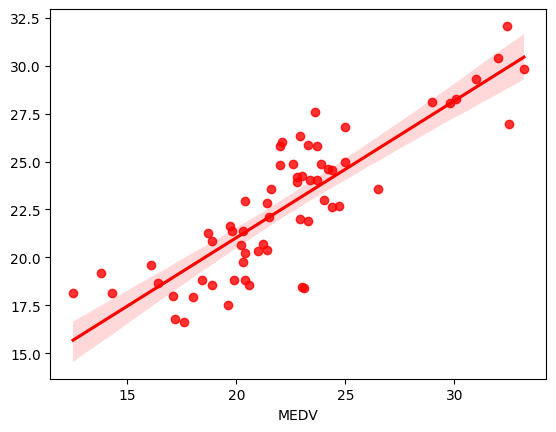

In [229]:
sns.regplot(x=y_test, y=regression.predict(X_test_scaled), color='red')
plt.show()